In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import prepare
import acquire

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
from wordcloud import WordCloud

url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samkeeler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samkeeler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [3]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [4]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
dtype: int64

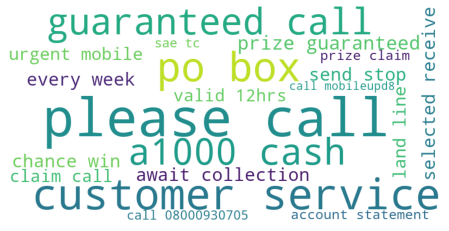

In [5]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

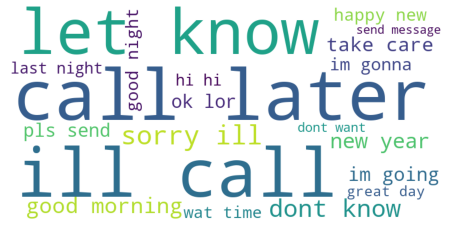

In [6]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

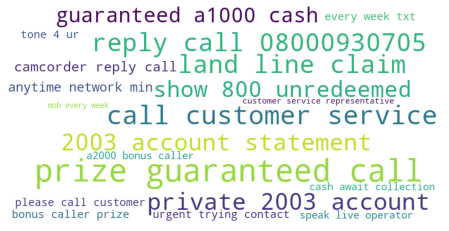

In [7]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

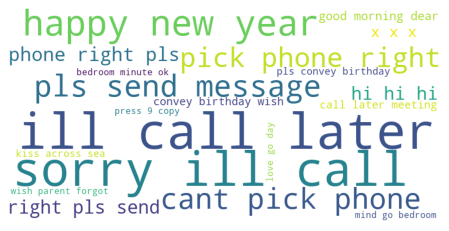

In [8]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
blogs = acquire.acquire_all_blogs()
blogs

,title,date,content
0,Codeup’s Data Science Career Accelerator is He...,"September 30, 2018",The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,"October 31, 2018",By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018","By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,"August 14, 2018",SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",Competitor Bootcamps Are Closing. Is the Model...


In [10]:
blogs = prepare.make_prepped_columns(blogs)
blogs.drop(columns = ['stemmed', 'clean', 'original'], inplace = True)

In [11]:
blogs

,title,date,lemmatized
0,Codeup’s Data Science Career Accelerator is He...,"September 30, 2018",the rumor are true the time ha arrived codeup ...
1,Data Science Myths - Codeup,"October 31, 2018",by dimitri antoniou and maggie giustdata scien...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",by dimitri antonioua week ago codeup launched ...
3,10 Tips to Crush It at the SA Tech Job Fair - ...,"August 14, 2018",sa tech job fairthe third biannual san antonio...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",competitor bootcamps are closing is the model ...


In [12]:
blogs.lemmatized.tolist()[0]

'the rumor are true the time ha arrived codeup ha officially opened application to our new data science career accelerator with only 25 seat available this immersive program is one of a kind in san antonio and will help you land a job in glassdoors 1 best job in americadata science is a method of providing actionable intelligence from data the data revolution ha hit san antonio resulting in an explosion in data scientist position across company like usaa accenture booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecurity center and school of data science we built a program to specifically meet the growing demand of this industryour program will be 18 week long fulltime handson and projectbased our curriculum development and instruction is led by senior data scientist maggie giust who ha worked at heb capital group and rackspace along with input from dozen of practitioner and hiring partner student will work with real data set realistic problem and the entire data 

In [13]:
blog_words = ' '.join(blogs['lemmatized'])

In [14]:
blog_words.split(' ')

['the',
 'rumor',
 'are',
 'true',
 'the',
 'time',
 'ha',
 'arrived',
 'codeup',
 'ha',
 'officially',
 'opened',
 'application',
 'to',
 'our',
 'new',
 'data',
 'science',
 'career',
 'accelerator',
 'with',
 'only',
 '25',
 'seat',
 'available',
 'this',
 'immersive',
 'program',
 'is',
 'one',
 'of',
 'a',
 'kind',
 'in',
 'san',
 'antonio',
 'and',
 'will',
 'help',
 'you',
 'land',
 'a',
 'job',
 'in',
 'glassdoors',
 '1',
 'best',
 'job',
 'in',
 'americadata',
 'science',
 'is',
 'a',
 'method',
 'of',
 'providing',
 'actionable',
 'intelligence',
 'from',
 'data',
 'the',
 'data',
 'revolution',
 'ha',
 'hit',
 'san',
 'antonio',
 'resulting',
 'in',
 'an',
 'explosion',
 'in',
 'data',
 'scientist',
 'position',
 'across',
 'company',
 'like',
 'usaa',
 'accenture',
 'booz',
 'allen',
 'hamilton',
 'and',
 'heb',
 'weve',
 'even',
 'seen',
 'utsa',
 'invest',
 '70',
 'm',
 'for',
 'a',
 'cybersecurity',
 'center',
 'and',
 'school',
 'of',
 'data',
 'science',
 'we',
 'built

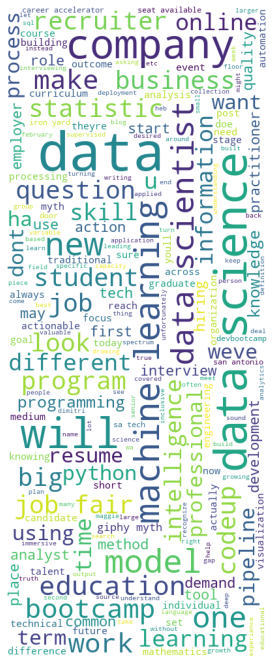

In [15]:
img = WordCloud(background_color='white', height=1000, width=400).generate(blog_words)
plt.figure(figsize=(6, 12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
blog_freq = pd.Series(blog_words).value_counts()

In [17]:
blog_freq

the rumor are true the time ha arrived codeup ha officially opened application to our new data science career accelerator with only 25 seat available this immersive program is one of a kind in san antonio and will help you land a job in glassdoors 1 best job in americadata science is a method of providing actionable intelligence from data the data revolution ha hit san antonio resulting in an explosion in data scientist position across company like usaa accenture booz allen hamilton and heb weve even seen utsa invest 70 m for a cybersecurity center and school of data science we built a program to specifically meet the growing demand of this industryour program will be 18 week long fulltime handson and projectbased our curriculum development and instruction is led by senior data scientist maggie giust who ha worked at heb capital group and rackspace along with input from dozen of practitioner and hiring partner student will work with real data set realistic problem and the entire data s

In [18]:
blog_words = prepare.remove_stopwords(blog_words)
pd.Series(blog_words.split(' ')).value_counts()

data                   69
science                25
company                19
learning               19
job                    14
                       ..
realized                1
gapsbustedvia           1
talking                 1
scientistsbustedvia     1
resulting               1
Length: 835, dtype: int64

In [19]:
articles = acquire.get_articles('science')

In [20]:
articles = pd.DataFrame(articles)

In [21]:
articles = prepare.make_prepped_columns(articles)
articles.drop(columns = ['stemmed', 'clean', 'original'], inplace = True)

In [22]:
article_words = ' '.join(articles['lemmatized'])

In [29]:
article_words = article_words.replace(' s ', '')
article_words = article_words.replace(' ha ', '')
article_words = article_words.replace(' u ', '')
article_words

"russia authorised a singledose version of sputnik v coronavirus vaccine called ' sputnik light ' which demonstrated 794 efficacy compared to 916 for the twoshot sputnik v sputnik lightproven effective against all new strain of coronavirus russia said the sputnik light claim to have developed virusneutralising antibody in 9167 of volunteer on the 28thday post immunisation canada 'university of british columbia researcher are the first to publish structural image of n501y mutation on sarscov2 spike protein a change believed to be partly responsible for the infectious nature and spread of variant b117 our analysis revealedeven though n501y mutant canenter our cell more readily it can still be neutralised by antibody a researcher said the centre for cellular and molecular biology ccmbsaid there is no unique andhra covid19 strain which is 15 time more virulent neither were any existing strain found to be more infectious than what we already saw before it added the ccmb further said that th

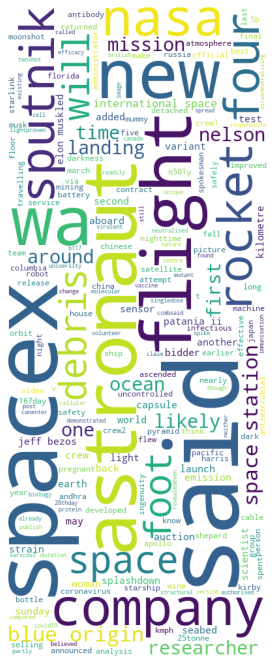

In [30]:
img = WordCloud(background_color='white', height=1000, width=400).generate(article_words)
plt.figure(figsize=(6, 12))
plt.imshow(img)
plt.axis('off')
plt.show()